In [8]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

## DistPlot from Data Talks

In [145]:
sns.set()
data = sns.load_dataset('tips')

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

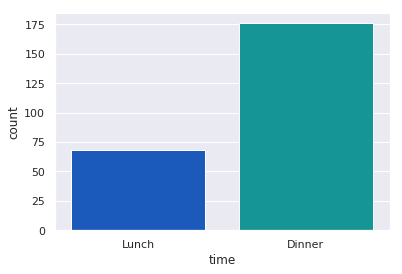

In [147]:
_ = sns.countplot(data['time'],palette = 'winter')
np.unique(data['day'])

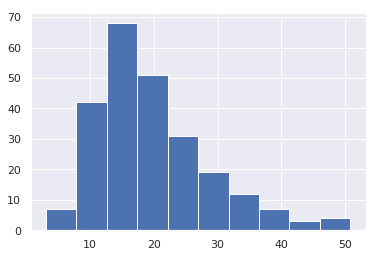

In [41]:
_ = plt.hist(data['total_bill'],)

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [48]:
labelencoder = LabelEncoder()
labelencoder = labelencoder.fit(data['time'])
time = labelencoder.transform(data['time'])

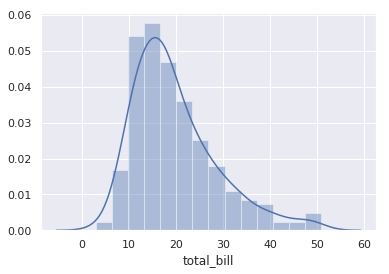

In [55]:
_ = sns.distplot(data['total_bill'])

In [62]:
le_sex = LabelEncoder()
le_sex = le_sex.fit(data['sex'])
data['sex'] = le_sex.transform(data['sex'])

In [64]:
le_smoke = LabelEncoder()
le_smoke = le_smoke.fit(data['smoker'])
data['smoker'] = le_smoke.transform(data['smoker'])

In [66]:
le_day = LabelEncoder()
le_day = le_day.fit(data['day'])
data['day'] = le_day.transform(data['day'])

In [150]:
data['time'] = time


In [135]:
X = data.loc[:,['total_bill','day','sex','smoker','time','size']].values
Y = data.loc[:,'tip'].values

In [142]:
np.unique(X[:,1])

array([0., 1.])

In [136]:
oe_day = OneHotEncoder(categorical_features = [1])
X = oe_day.fit_transform(X).toarray()

/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [137]:
data.shape

(244, 7)

In [141]:
X = X[:,1:]
X

array([[ 1.  ,  0.  , 16.99, ...,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  , 10.34, ...,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  , 21.01, ...,  0.  ,  0.  ,  3.  ],
       ...,
       [ 0.  ,  0.  , 22.67, ...,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  , 17.82, ...,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  , 18.78, ...,  0.  ,  0.  ,  2.  ]])

In [84]:
from sklearn.preprocessing import StandardScaler
sc_day = StandardScaler()
sc_day = sc_day.fit(X)
X[:,1] = sc_day.transform()

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [155]:
def labelencode(col):
    le_day = LabelEncoder()
    le_day = le_day.fit(col)
    return le_day.transform(col)

In [157]:
cat = ['sex','smoker','day','time']
l = []
for i in cat:
    l.append(labelencode(data[i]))

In [181]:
def onehotencode(var): 
    oe_day = OneHotEncoder()
    var = oe_day.fit_transform(var).toarray()
    return var[:,1:]

In [197]:
sex = pd.DataFrame(l[0])
smoker = pd.DataFrame(l[1])
day = pd.DataFrame(l[2])
time = pd.DataFrame(l[3])

sex = onehotencode(sex)
smoker = onehotencode(smoker)
day = onehotencode(day)
time = onehotencode(time)

sex = pd.DataFrame(sex)
sex.rename(columns = {0:'sex'})
smoker = pd.DataFrame(smoker)
day = pd.DataFrame(day)
time = pd.DataFrame(time)

/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='

In [199]:
df = pd.DataFrame([])
df1 = pd.concat([df,sex,smoker,day,time,data['total_bill'],data['size']],axis = 1)

In [200]:
X = df1.values

In [203]:
Y = data['tip'].values

In [232]:
from sklearn.preprocessing import StandardScaler
sc_day = StandardScaler()
sc_day = sc_day.fit(X)
X = sc_day.transform(X)

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [234]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)

In [235]:
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(Y_test,y_pred)
loss

0.8939195221609603

In [236]:
y_pred

array([2.75976768, 2.99712626, 2.81673204, 1.4632311 , 3.12654885,
       1.77482578, 2.54679105, 3.11359077, 2.88681115, 4.50140326,
       3.18428659, 3.17091975, 2.3527022 , 2.29224593, 2.87517409,
       4.16944264, 1.92603957, 2.24308317, 2.3679374 , 3.30322842,
       3.79547836, 2.84290839, 2.5417152 , 2.43574813, 2.32853543,
       2.58333477, 2.76729999, 4.59978345, 3.73195325, 2.40199442,
       2.31295548, 2.27962689, 2.46828159, 1.92661159, 2.71399481,
       2.30185826, 2.71063603, 2.09555601, 5.60088215, 3.34295006,
       2.25147162, 2.27534617, 2.56519997, 4.33905752, 2.11239476,
       2.81768662, 2.60608807, 2.99566606, 2.72262204])

In [228]:
Y_test

array([2.64, 3.76, 3.51, 1.  , 2.5 , 1.  , 3.08, 5.65, 3.5 , 3.68, 5.  ,
       4.29, 2.5 , 2.  , 1.58, 5.6 , 1.5 , 3.  , 3.  , 4.  , 2.  , 4.08,
       2.  , 1.96, 2.  , 2.5 , 2.2 , 4.2 , 4.71, 2.23, 2.2 , 2.52, 1.57,
       1.61, 3.  , 2.61, 3.07, 2.  , 9.  , 3.  , 1.92, 1.8 , 3.  , 5.14,
       2.23, 3.5 , 3.76, 3.92, 3.  ])